In [88]:
# Notebook상에서 차트를 바로 그려주는 옵션
%matplotlib inline

In [89]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns



## -------------------------------------------------------------
## [1단계] 데이터 세트를 만든다.
## -------------------------------------------------------------

In [90]:
# train.csv 데이터 로드 (891건)
train = pd.read_csv("./resource/titanic/train.csv", index_col=["PassengerId"])

print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [91]:
# test.csv 데이터 로드 (418건)
test = pd.read_csv("./resource/titanic/test.csv", index_col=["PassengerId"])

print(test.shape)
test.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [92]:
# train.csv 파일과 test.csv 파일의 차이는 Surviced 컬럼의 존재 유무이다.

# 데이터 전처리를 위해서 두 데이터를 하나로 합친다. (1309건)
combi = pd.concat([train, test])

print(combi.shape)
combi.head()

(1309, 11)


,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450


In [93]:
# 성별 항목를 코드화
combi["Gender_encode"] = (combi["Sex"] == "male").astype(int)

print(combi.shape)
combi[["Sex", "Gender_encode"]].head()

(1309, 12)


,Sex,Gender_encode
PassengerId,,
1,male,1
2,female,0
3,female,0
4,female,0
5,male,1


In [94]:
# 표값 항목의 평균값
mean_fare = train["Fare"].mean()

print("Fare(Mean) = ${0:.3f}".format(mean_fare))

Fare(Mean) = $32.204


In [95]:
# 표값 항목의 쓰레기값을 평균값으로 초기화
combi["Fare_fillout"] = combi["Fare"]
combi.loc[pd.isnull(combi["Fare"]), "Fare_fillout"] = mean_fare

missing_fare = combi[pd.isnull(combi["Fare"])]

print(missing_fare.shape)
missing_fare[["Fare", "Fare_fillout"]].head()

(1, 13)


,Fare,Fare_fillout
PassengerId,,
1044,NaN,32.204208


In [96]:
# 출항지 항목을 코드화
embarked = pd.get_dummies(combi["Embarked"], prefix="Embarked").astype(np.bool)

print(embarked.shape)
embarked.head()

(1309, 3)


,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
1,False,False,True
2,True,False,False
3,False,False,True
4,False,False,True
5,False,False,True


In [97]:
# 생성한 출항지 코드를 데이터에 삽입
combi = pd.concat([combi, embarked], axis=1)

print(combi.shape)
combi[["Embarked", "Embarked_C", "Embarked_Q", "Embarked_S"]].head()

(1309, 16)


,Embarked,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,
1,S,False,False,True
2,C,True,False,False
3,S,False,False,True
4,S,False,False,True
5,S,False,False,True


In [98]:
# 가족수 항목을 생성
combi["Family"] = combi["SibSp"] + combi["Parch"]

print(combi.shape)
combi.head()

(1309, 17)


,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Gender_encode,Fare_fillout,Embarked_C,Embarked_Q,Embarked_S,Family
PassengerId,,,,,,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171,1,7.2500,False,False,True,1
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599,0,71.2833,True,False,False,1
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282,0,7.9250,False,False,True,0
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803,0,53.1000,False,False,True,1
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450,1,8.0500,False,False,True,0




## -------------------------------------------------------------
## [2단계] 각종 차트로 데이터를 시각화해본다.
## -------------------------------------------------------------

In [99]:
# Matplotlib (기본적인 시각화 패키지)
# https://datascienceschool.net/view-notebook/d0b1637803754bb083b5722c9f2209d0/

# Seaborn (Matplotlib 기반의 통계용 시각화 패키지)
# https://datascienceschool.net/view-notebook/4c2d5ff1caab4b21a708cc662137bc65/

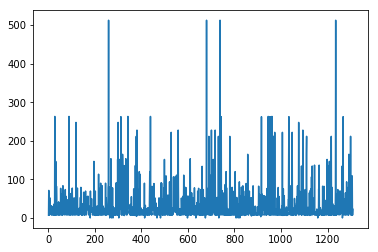

In [100]:
# 라인 플롯 : 가장 간단한 선을 그리는 함수. 데이터가 시간, 순서에 따라 어떻게 변화하는 보여준다.

# 모든 티켓 가격을 선으로 그려본다. 
data=combi[["Fare"]]
plt.plot(data)

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:788: RuntimeWarning: invalid value encountered in less
  scalex = (xx < xmin) or (xx > xmax)
C:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:788: RuntimeWarning: invalid value encountered in greater
  scalex = (xx < xmin) or (xx > xmax)


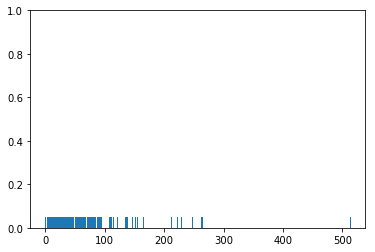

In [101]:
# 1차원 실수 분포 플롯 : 1차원 데이터를 히스토그램과 같은 분포도로 보여준다.

# 모든 티켓 가격의 분포도를 그려본다.
data=combi[["Fare"]]
sns.rugplot(data)
#sns.kdeplot(data)
#sns.distplot(data)


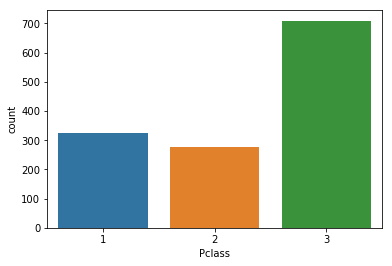

In [102]:
# 카운트 플롯 (Count Plot): 각 카테고리 값별로 데이터가 얼마나 있는지 표시한다.

# 선실등급별 카운트
sns.countplot(x="Pclass", data=combi)

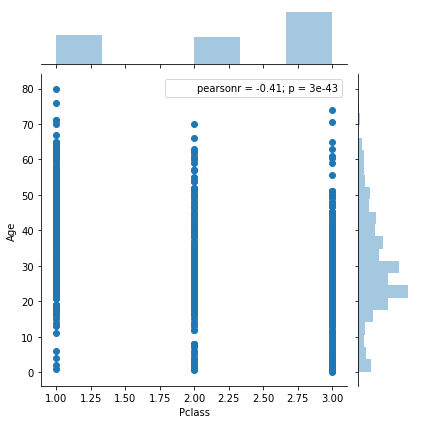

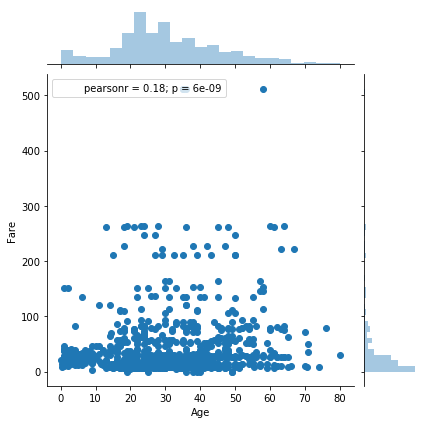

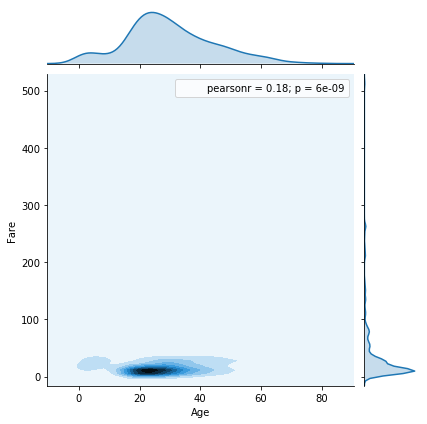

In [103]:
# 스캐터 플롯 (Scatter Plot) : 2차원 실수형 데이터를 분석한다.

# 선실등급별 나이
sns.jointplot(x="Pclass", y="Age", data=combi)

# 나이별 티켓가격
sns.jointplot(x="Age", y="Fare", data=combi)
sns.jointplot(x="Age", y="Fare", data=combi, kind="kde")

In [104]:
# HeatMap : 2차원 카테고리 데이터를 표현한다.

# 선실등급과 성별의 2차원 카테고리 데이터
titanic_size = combi.pivot_table(index="Pclass", columns="Sex", aggfunc="size")
titanic_size.head()

Sex,female,male
Pclass,,
1,144,179
2,106,171
3,216,493


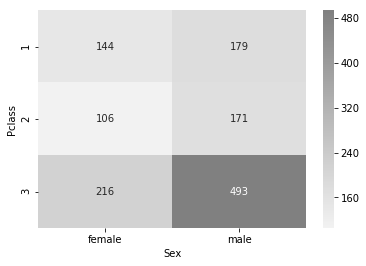

In [105]:
# 선실등급과 성별의 2차원 카테고리 데이터 HeatMap
sns.heatmap(titanic_size, cmap=sns.light_palette("gray", as_cmap=True), annot=True, fmt="d")

In [106]:
# 상관관계 (Correlation) 분석 
# 1 :  상관 (양의 상관관계)
# 0 :  무상관
# -1 : 반상관 (음의 상관관계)
corr = combi.corr()
corr = corr.applymap(lambda x: round(x,3))

corr

,Age,Fare,Parch,Pclass,SibSp,Survived,Gender_encode,Fare_fillout,Embarked_C,Embarked_Q,Embarked_S,Family
Age,1.000,0.179,-0.151,-0.408,-0.244,-0.077,0.064,0.178,0.086,-0.019,-0.076,-0.240
Fare,0.179,1.000,0.222,-0.559,0.160,0.257,-0.186,1.000,0.286,-0.130,-0.173,0.226
Parch,-0.151,0.222,1.000,0.018,0.374,0.082,-0.213,0.222,-0.009,-0.101,0.073,0.792
Pclass,-0.408,-0.559,0.018,1.000,0.061,-0.338,0.125,-0.558,-0.270,0.230,0.096,0.050
SibSp,-0.244,0.160,0.374,0.061,1.000,-0.035,-0.110,0.160,-0.048,-0.049,0.075,0.862
Survived,-0.077,0.257,0.082,-0.338,-0.035,1.000,-0.543,0.257,0.168,0.004,-0.156,0.017
Gender_encode,0.064,-0.186,-0.213,0.125,-0.110,-0.543,1.000,-0.185,-0.067,-0.089,0.120,-0.189
Fare_fillout,0.178,1.000,0.222,-0.558,0.160,0.257,-0.185,1.000,0.286,-0.130,-0.173,0.226
Embarked_C,0.086,0.286,-0.009,-0.270,-0.048,0.168,-0.067,0.286,1.000,-0.164,-0.775,-0.037
Embarked_Q,-0.019,-0.130,-0.101,0.230,-0.049,0.004,-0.089,-0.130,-0.164,1.000,-0.490,-0.087


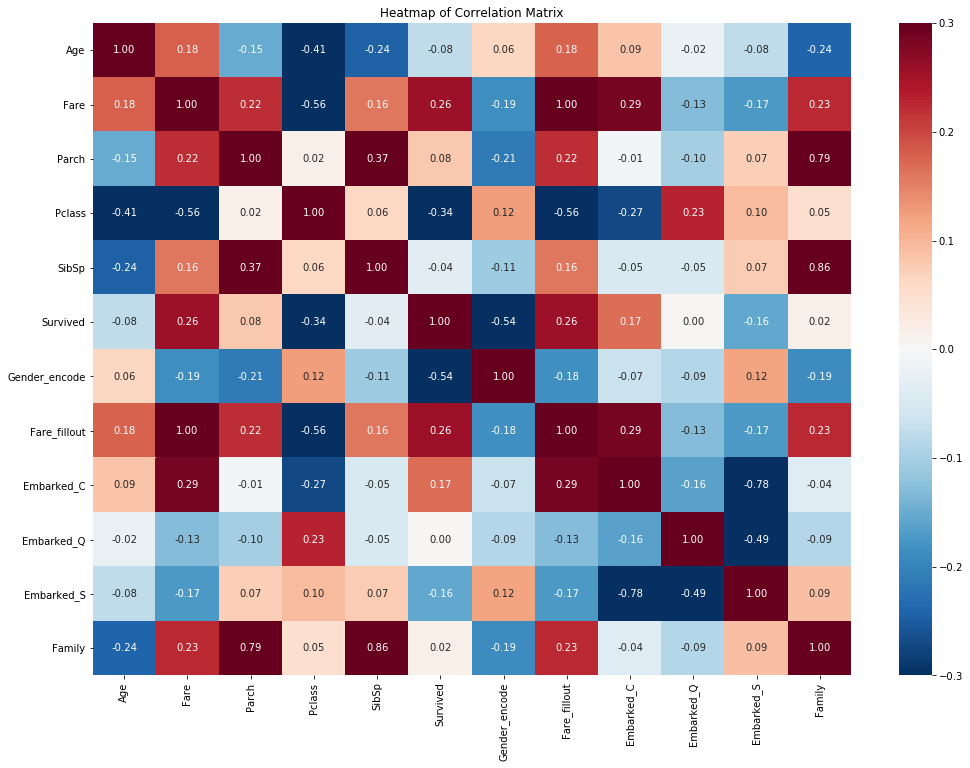

In [112]:
# 상관관계를 HeatMap으로 그려본다.
plt.figure(figsize=(17,12))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='RdBu_r', vmax=.3, vmin=-.3)

plt.title('Heatmap of Correlation Matrix')

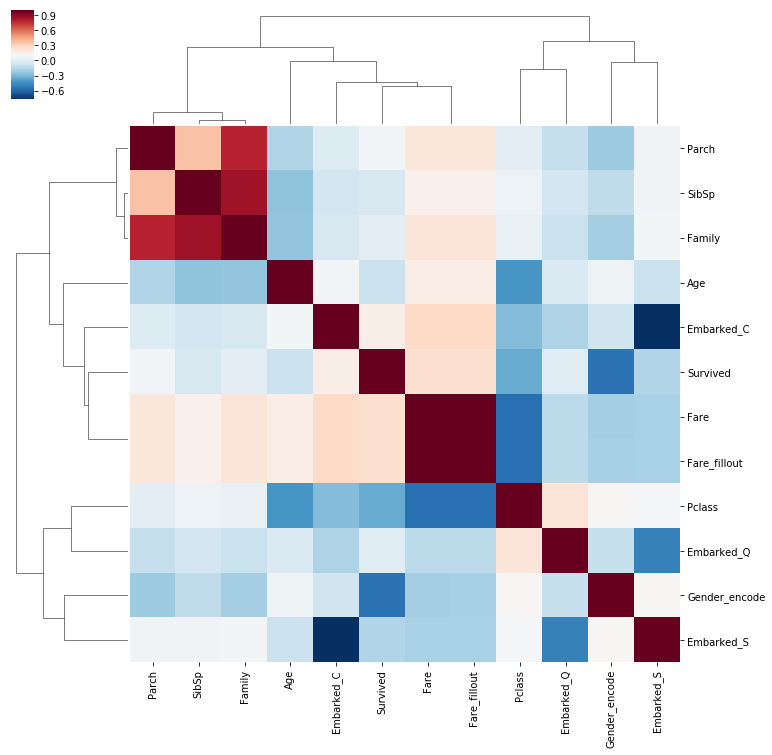

In [113]:
# 상관관계를 ClusterMap으로 그려본다.
sns.clustermap(corr, cmap='RdBu_r', figsize=(12,12),metric='cosine')



## -------------------------------------------------------------
## [3단계] 트레이닝 세트와 테스트 세트를 분리한다. 
## -------------------------------------------------------------

In [114]:
# 트레이닝셋 분리 (Survived  NotEmpty)
train = combi[pd.notnull(combi["Survived"])]

# 1309건 중 891건
print(train.shape)
train.head()

(891, 17)


,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Gender_encode,Fare_fillout,Embarked_C,Embarked_Q,Embarked_S,Family
PassengerId,,,,,,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171,1,7.2500,False,False,True,1
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599,0,71.2833,True,False,False,1
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282,0,7.9250,False,False,True,0
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803,0,53.1000,False,False,True,1
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450,1,8.0500,False,False,True,0


In [115]:
# 테스트셋 분리 (Survived Empty)
test = combi[pd.isnull(combi["Survived"])]
test.drop("Survived", axis=1, inplace=True)

# 1309건 중 418건
print(test.shape)
test.head()

(418, 16)


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Ticket,Gender_encode,Fare_fillout,Embarked_C,Embarked_Q,Embarked_S,Family
PassengerId,,,,,,,,,,,,,,,,
892,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,3,male,0,330911,1,7.8292,False,True,False,0
893,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,3,female,1,363272,0,7.0000,False,False,True,1
894,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,2,male,0,240276,1,9.6875,False,True,False,0
895,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,3,male,0,315154,1,8.6625,False,False,True,0
896,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,3,female,1,3101298,0,12.2875,False,False,True,2




## -------------------------------------------------------------
## [4단계] 트레이닝 세트로 학습을 시작한다.
## -------------------------------------------------------------

In [116]:
# 트레이닝 세트에서 사용 할 Feature 선택 : 알고리즘 학습에 중요한 요소이므로 많은 비교 분석이 필요하다. 

# 4가지 Feature를 선택했다. (선실등급, 성별, 타켓가격, 출항지)
feature_names = ["Pclass", "Gender_encode", "Fare_fillout"]
feature_names = feature_names + list(embarked.columns)

In [117]:
# X_tran 생성 (학습데이터)
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(891, 6)


,Pclass,Gender_encode,Fare_fillout,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,
1,3,1,7.2500,False,False,True
2,1,0,71.2833,True,False,False
3,3,0,7.9250,False,False,True
4,1,0,53.1000,False,False,True
5,3,1,8.0500,False,False,True


In [118]:
# y_train 생성 (학습데이터 정답)
y_train = train["Survived"]

print(y_train.shape)
y_train.head()

(891,)


PassengerId
1    0.0
2    1.0
3    1.0
4    1.0
5    0.0
Name: Survived, dtype: float64

In [119]:
# X_test 생성 (검증데이터)
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(418, 6)


,Pclass,Gender_encode,Fare_fillout,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,
892,3,1,7.8292,False,True,False
893,3,0,7.0000,False,False,True
894,2,1,9.6875,False,True,False
895,3,1,8.6625,False,False,True
896,3,0,12.2875,False,False,True


In [120]:
# y_test 생성 (검증데이터 정답)

# 정답지를 로딩한다.
submission = pd.read_csv("./resource/titanic/gender_submission.csv", index_col="PassengerId")

y_test = submission["Survived"]

print(y_test.shape)
y_test.head()

(418,)


PassengerId
892    0
893    1
894    0
895    0
896    1
Name: Survived, dtype: int64

In [121]:
# SkLearn (머신러닝 패키지)
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score

from time import time
from sklearn import metrics
from optparse import OptionParser


In [123]:
# Decision Tree 알고리즘으로 학습을 시작한다.
tree = DecisionTreeClassifier(random_state=37, max_depth=5)
tree.fit(X_train, y_train)

print("Train set accuracy = ", tree.score(X_train, y_train))
print("Test set accuracy = ", tree.score(X_test, y_test))

Train set accuracy =  0.829405162738
Test set accuracy =  0.94019138756


In [126]:
# Random Forest 알고리즘으로 학습을 시작한다.
randomforest = RandomForestClassifier(n_estimators=1000, max_depth=None, 
                                      min_samples_split=2, 
                                      random_state=10)
randomforest.fit(X_train, y_train)

print("Train set accuracy = ", randomforest.score(X_train, y_train))
print("Test set accuracy = ", randomforest.score(X_test, y_test))
#print("CV 10fold = ", cross_val_score(randomforest, train, test, cv=10).mean())
print(metrics.classification_report(y_test, tree.predict(X_test)))
print("Random Forest:\n", metrics.confusion_matrix(y_test, tree.predict(X_test)))

Train set accuracy =  0.909090909091
Test set accuracy =  0.877990430622
             precision    recall  f1-score   support

          0       0.91      1.00      0.96       266
          1       1.00      0.84      0.91       152

avg / total       0.95      0.94      0.94       418

Random Forest:
 [[266   0]
 [ 25 127]]


In [127]:
# Gradient Boostring Decision Tree 알고리즘으로 학습을 시작한다.
gbdt = GradientBoostingClassifier(n_estimators=1000, 
                                  max_depth=4,
                                  min_weight_fraction_leaf=0.1,
                                  random_state = 10)
gbdt.fit(X_train, y_train)

print("Train set accuracy = ", gbdt.score(X_train, y_train))
print("Test set accuracy = ", gbdt.score(X_test, y_test))

Train set accuracy =  0.864197530864
Test set accuracy =  0.8995215311


In [132]:
# Logistic Regression 알고리즘으로 학습을 시작한다.
logistic = LogisticRegression(random_state=10)
logistic.fit(X_train, y_train)

print("Train set accuracy = ", logistic.score(X_train, y_train))
print("Test set accuracy = ", logistic.score(X_test, y_test))
#print("CV 10fold = ", cross_val_score(logistic, X, y, cv=10).mean())

Train set accuracy =  0.783389450056
Test set accuracy =  0.964114832536


In [133]:
# Support Vector Machine 알고리즘으로 학습을 시작한다.
svc = SVC(random_state=10)
svc.fit(X_train, y_train)

print("Train set accuracy = ", svc.score(X_train, y_train))
print("Test set accuracy = ", svc.score(X_test, y_test))
#print("CV 10fold = ", cross_val_score(svc, X, y, cv=10).mean())

Train set accuracy =  0.814814814815
Test set accuracy =  0.885167464115


In [134]:
# K-Nearest Neighbers 알고리즘으로 학습을 시작한다.
knn = KNeighborsClassifier(weights='distance', n_neighbors=20)
knn.fit(X_train, y_train)

print("Train set accuracy = ", knn.score(X_train, y_train))
print("Test set accuracy = ", knn.score(X_test, y_test))
#print("CV 10fold = ", cross_val_score(knn, X, y, cv=10).mean())

Train set accuracy =  0.909090909091
Test set accuracy =  0.83971291866


In [135]:
# Multinomia Naive Bayes 알고리즘으로 학습을 시작한다.
nb = MultinomialNB(alpha=.1)
nb.fit(X_train, y_train)

print("Train set accuracy = ", nb.score(X_train, y_train))
print("Test set accuracy = ", nb.score(X_test, y_test))
#print("CV 10fold = ", cross_val_score(nb, X, y, cv=10).mean())

Train set accuracy =  0.690235690236
Test set accuracy =  0.674641148325


In [136]:
# Multi-Layer Perceptron 알고리즘으로 학습을 시작한다.
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20, 4), random_state=10, max_iter=1000)
mlp.fit(X_train, y_train)

print("Train set accuracy = ", mlp.score(X_train, y_train))
print("Test set accuracy = ", mlp.score(X_test, y_test))
#print("CV 10fold = ", cross_val_score(mlp, X, y, cv=10).mean())

Train set accuracy =  0.776655443322
Test set accuracy =  0.933014354067




## -------------------------------------------------------------
## [5단계] 학습모델을 검증한다.
## -------------------------------------------------------------

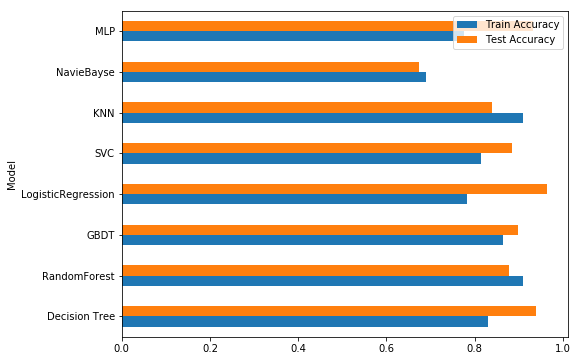

In [138]:
# 각각의 모델을 비교해본다.
models = [tree, randomforest, gbdt, logistic, svc, knn, nb, mlp]
modelNames = ['Decision Tree', 'RandomForest', 'GBDT', 'LogisticRegression', 'SVC', 'KNN', 'NavieBayse', 'MLP']

scores = [(name, clf.score(X_train, y_train), clf.score(X_test, y_test)) for name, clf in zip(modelNames, models)]
score_ds = pd.DataFrame(scores, columns=['Model', 'Train Accuracy', 'Test Accuracy'])

score_ds.plot(kind='barh', x='Model', figsize=(8,6))

In [141]:
# 모델별로 정확도를 비교해본다. 

# 최고점 모델을 확인한다.
print("Test set accuracy = ", tree.score(X_test, y_test))
print("Test set accuracy = ", randomforest.score(X_test, y_test))
print("Test set accuracy = ", gbdt.score(X_test, y_test))
print("Test set accuracy = ", logistic.score(X_test, y_test))
print("Test set accuracy = ", svc.score(X_test, y_test))
print("Test set accuracy = ", knn.score(X_test, y_test))
print("Test set accuracy = ", nb.score(X_test, y_test))
print("Test set accuracy = ", mlp.score(X_test, y_test))

# 우리 시스템에서 활용 할 모델
# logistic 0.964114832536

Test set accuracy =  0.94019138756
Test set accuracy =  0.877990430622
Test set accuracy =  0.8995215311
Test set accuracy =  0.964114832536
Test set accuracy =  0.885167464115
Test set accuracy =  0.83971291866
Test set accuracy =  0.674641148325
Test set accuracy =  0.933014354067




## -------------------------------------------------------------
## [6단계] 학습모델을 활용한다.
## -------------------------------------------------------------

In [142]:
# 문제를 로딩한다.
submission = pd.read_csv("./resource/titanic/gender_submission.csv", index_col="PassengerId")
submission.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [143]:
# 생성된 모델을 이용하여 문제의 결과를 예측한다.
prediction = logistic.predict(X_test)

print(prediction.shape)
prediction[:20]

(418,)


array([ 0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,
        0.,  1.,  1.,  0.,  0.,  1.,  1.])

In [144]:
# 결과를 출력한다.
submission["P_Survived"] = prediction.astype(np.int32)

print(submission.shape)
submission.head()

(418, 2)


,Survived,P_Survived
PassengerId,,
892,0,0
893,1,1
894,0,0
895,0,0
896,1,1


In [145]:
# 결과를 csv 파일로 생성한다.
submission.to_csv("./resource/titanic/result.csv")